## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

## How the data looks like?

In [2]:
df = pd.read_csv(r"C:\Users\admin\OneDrive\Documents\Inno ML DL\Machine Learning Imp files\Churn Prediction Project\churn_dataset.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2543,0952-KMEEH,Male,0,No,No,13,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,98.15,1230.25,Yes
3624,9544-PYPSJ,Female,1,Yes,Yes,62,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),96.10,6019.35,No
652,5845-BZZIB,Male,0,Yes,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,655.3,No
1806,8966-KZXXA,Male,0,Yes,Yes,36,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.10,930.95,No
6724,7359-SSBJK,Female,1,No,No,64,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),70.20,4481,Yes
5170,7721-DVEKZ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No
161,0867-MKZVY,Female,0,Yes,No,20,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,82.40,1592.35,Yes
4334,3969-GYXEL,Female,0,No,No,11,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,76.40,838.7,No
5873,2122-YWVYA,Female,0,No,No,18,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.40,1380.4,No
3627,3243-ZHOHY,Female,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,296.15,No


This is how the data looks like. df.sample method allows us to see the random rows, not the first rows where data is clean.

In [3]:
df_dup = df.copy()

## How big the data is?

In [4]:
df.shape

(7043, 21)

The data contains 7043 rows and 21 columns. Larger the data easier for the model to predict. This data contains 21 columns so. it automatically hides some columns, we are going to use pd.set_option method to view all columns

In [5]:
pd.set_option('display.max_columns',None) ## now we can see all the columns

## What are datatypes of the columns in the data?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Looks like we have 3 numerical columns and 18 categorical columns in the dataset

`insight`: why is the column Total Charges is in object data type?

looks like the data got entered in '' so it is in object data type we're going to convert it into float64 datatype.

## Does our dataset contains null values?

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

None of the columns contains any null values, which give us fair bit of work.!

## How does our data look statistically?

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


So far the numerical columns are good. The tenure column may have outliers in the lower bound because the 25% is much lower than the median (50%), maybe new customers. 

## Any duplicates in our data?

In [9]:
df.duplicated().sum()

0

## Now lets see the relation b/w each column

In [10]:
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_1300\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


for now we can see only for 3 numerical columns.

## Data Manipulation

- The customer ID not much useful for us, so we'll drop the custoer ID column and convert the categorical column into binary values including the target variable

- we are going to convert the Total Charges column into float64 datatype so, we can check correlation properly and visualize the data

In [11]:
## dropping the customer id column using df.drop method

df.drop(['customerID'],axis=1,inplace=True)

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

print(df['TotalCharges'].dtype)

float64


In [13]:
## converting the predictor variable into binary numerical values
df2 = df
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [14]:
cat_cols = df2.select_dtypes(include=['object']).columns

In [15]:
df_dummies = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

In [16]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Exploratory Data Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

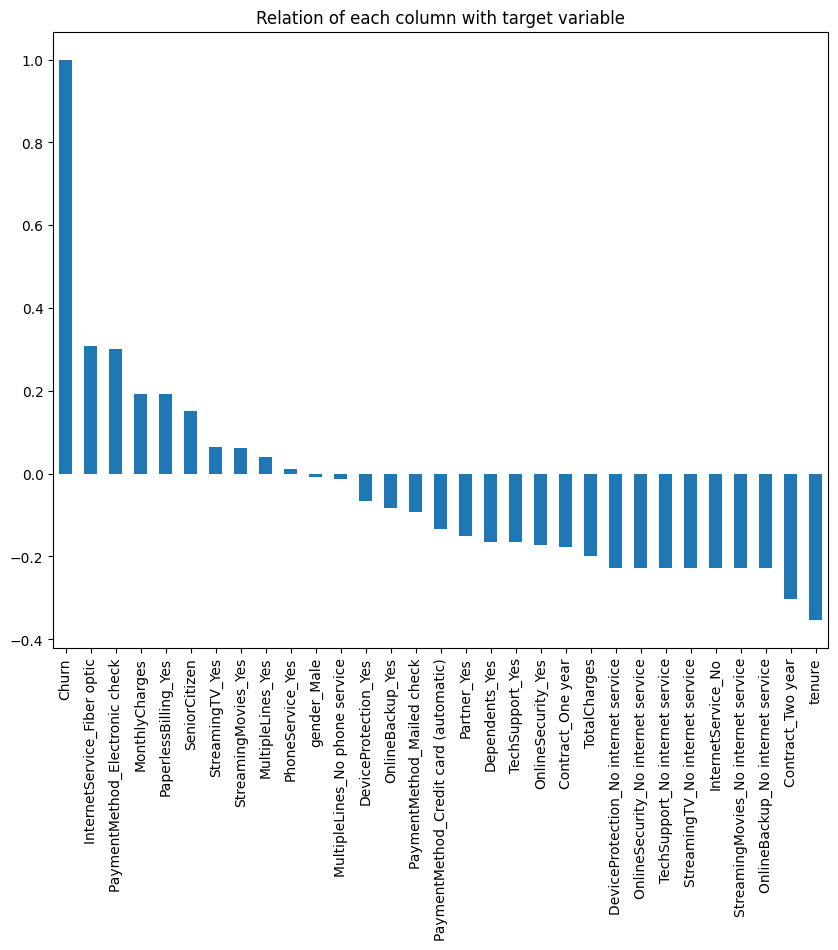

In [18]:
plt.figure(figsize=(10,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title("Relation of each column with target variable")
plt.xticks(rotation=90)
plt.show()

`observation`: Internet Service which has fibre optic, payment method which has electronic check and monthly charges are seemed to be postively related to churn.

Interestingly services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

*Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.*

We are going to analyze the data on 1. customer based, 2. customer account based and 3.services based

### **A. demographics**: Let us first understand the gender, partner and dependent status of the customers

## 1. Gender distribution of the customers

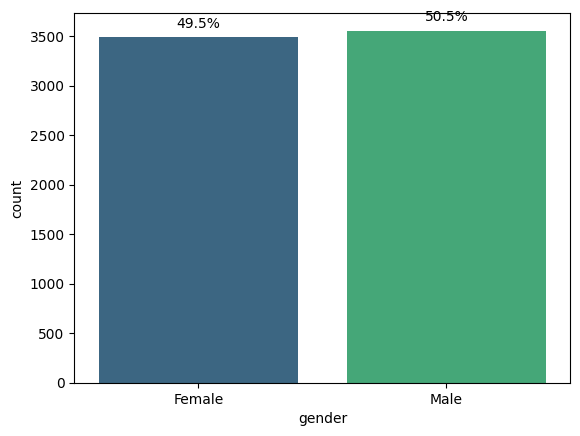

In [19]:
ax = sns.countplot(x='gender',data=df,palette='viridis',)
total = len(df['gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

`Observation`: About half of the customers are male and another half are female. Gender is not at all related to churn

## 2. Partner and dependent status

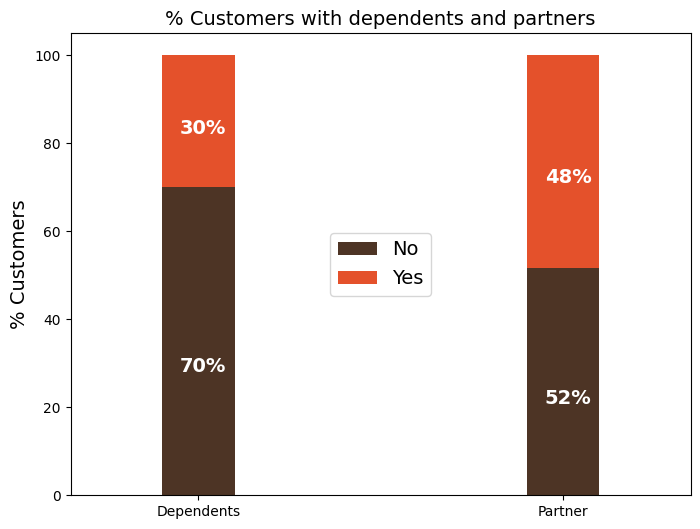

In [20]:
df2 = pd.melt(df_dup, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df_dup)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

`Observation`: By the above graph, we can say 70% of cutomers don't have any dependents, while 52% of cutomers does'nt have partners also.

## 3. senior citizens

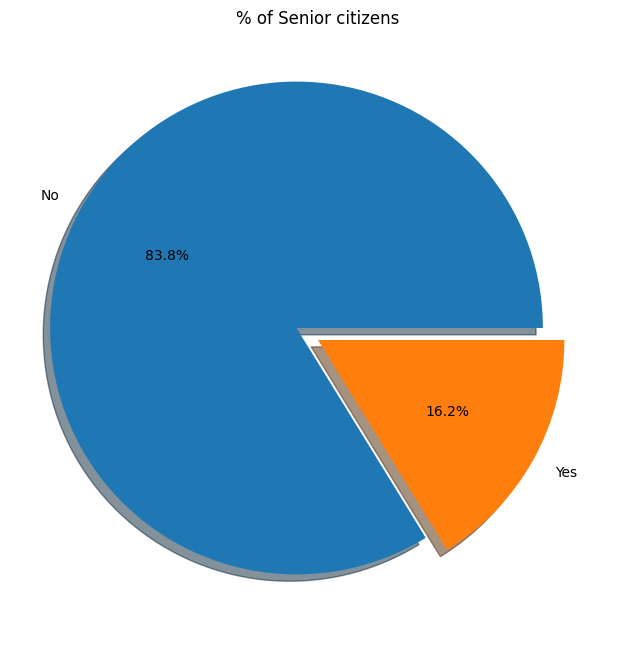

In [21]:
senior = df['SeniorCitizen'].value_counts()*100.0 /len(df)
explode = (0.1,0)
plt.figure(figsize=(8,8))
plt.pie(senior, labels=['No','Yes'],explode=explode, autopct='%1.1f%%', shadow=True)
plt.title("% of Senior citizens")

plt.show()

`observation`: There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

### Customer Account based Analysis

## 1. Account Tenure

<Axes: xlabel='tenure', ylabel='Count'>

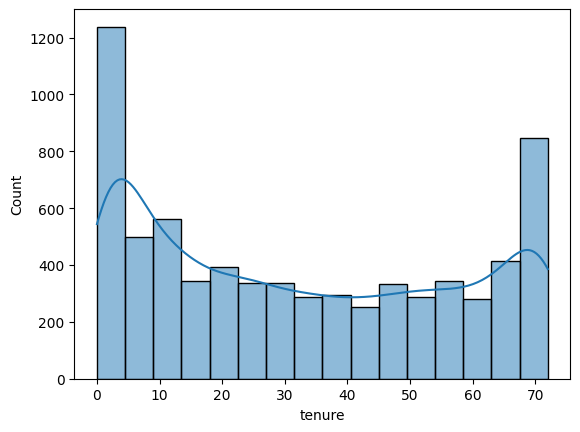

In [22]:
sns.histplot(df['tenure'],kde=True)

`observation`:After looking at the above histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

## 2. Contract

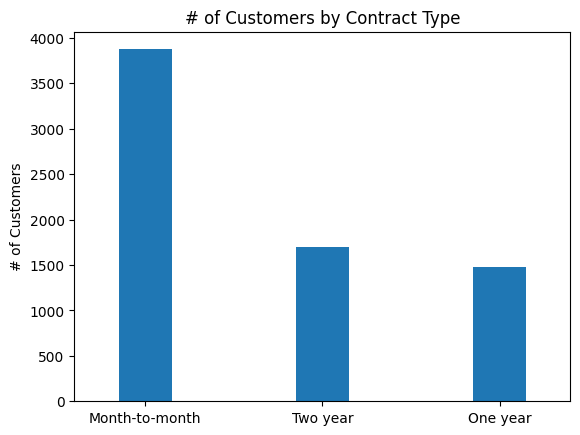

In [23]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, )
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')
plt.show()

`observations`:As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

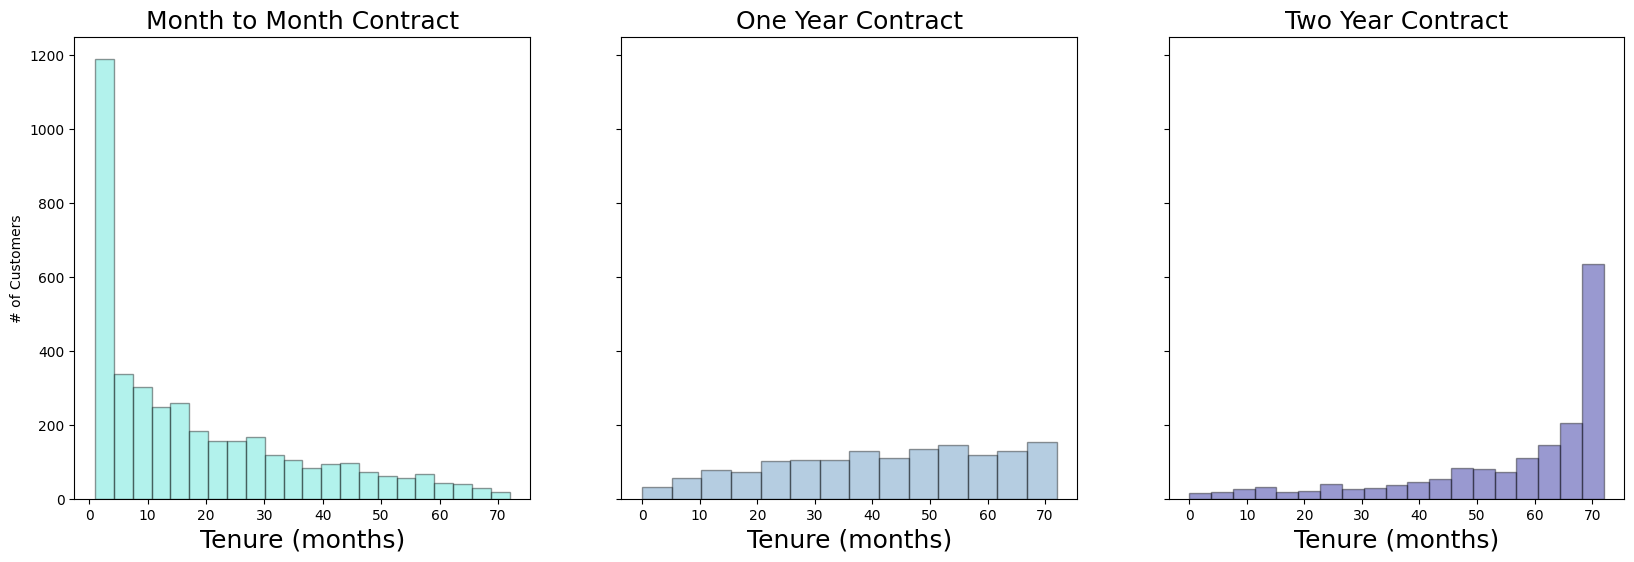

In [24]:
import warnings
warnings.filterwarnings('ignore')



fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                    color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)',size=18)
ax.set_title('Month to Month Contract',size=18)

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                    color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size=18)
ax.set_title('One Year Contract',size=18)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                  color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size=18)
ax.set_title('Two Year Contract',size=18)

plt.show()

`observation`:  most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

### Now let's see dist of all services used by customers

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

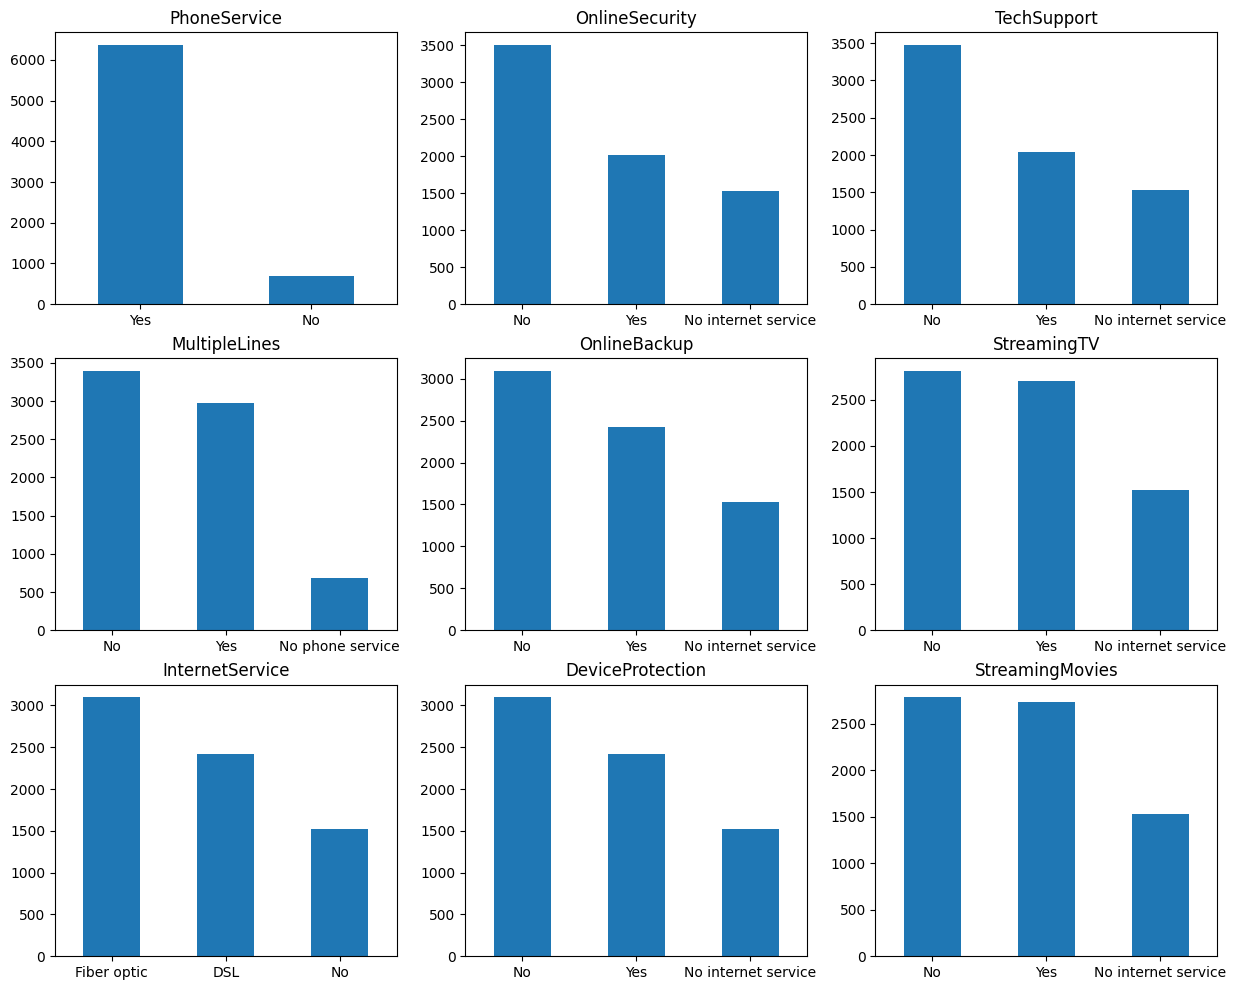

In [26]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### Let's see the relation of montly charges and total charges

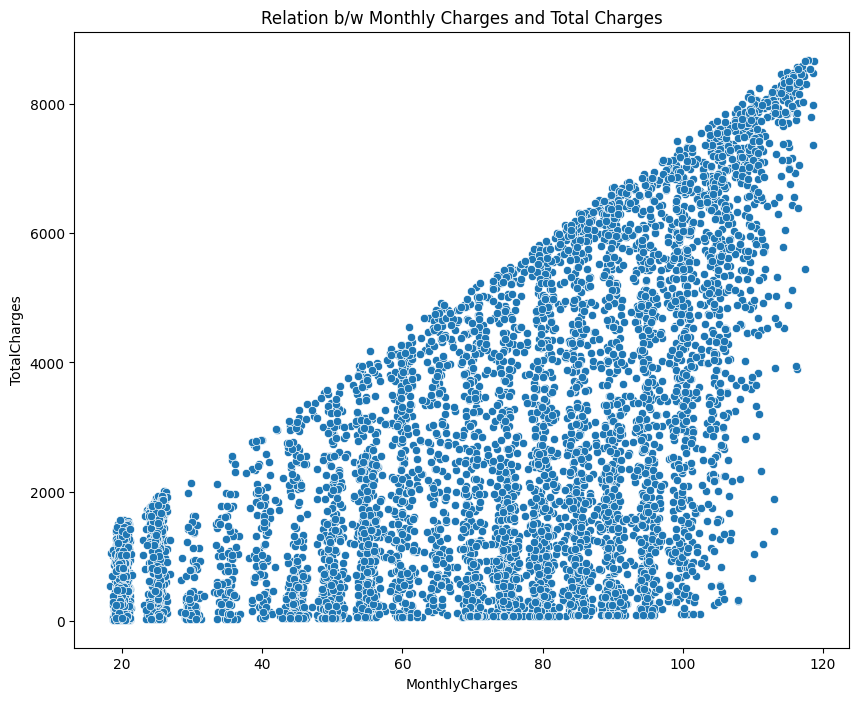

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,palette='viridis',markers=True)
plt.title("Relation b/w Monthly Charges and Total Charges")
plt.show()

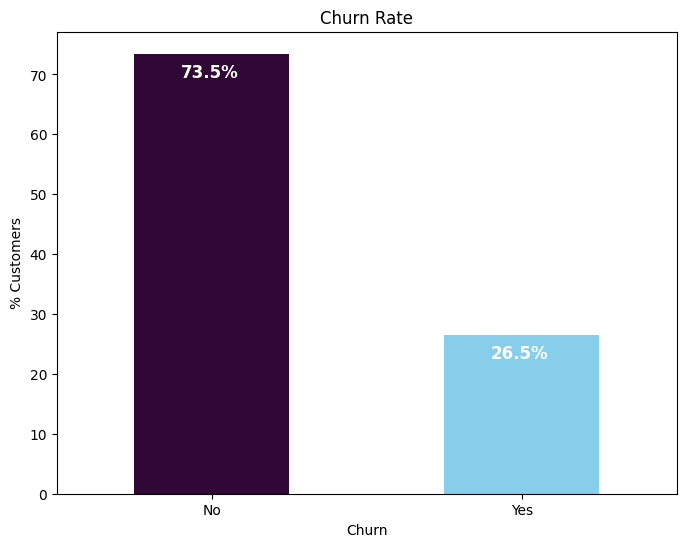

In [28]:
colors = ['#310736','#87CEEB']
ax = (df_dup['Churn'].value_counts()*100.0 /len(df_dup)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

`Observation`: In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

#### Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

## 1.Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

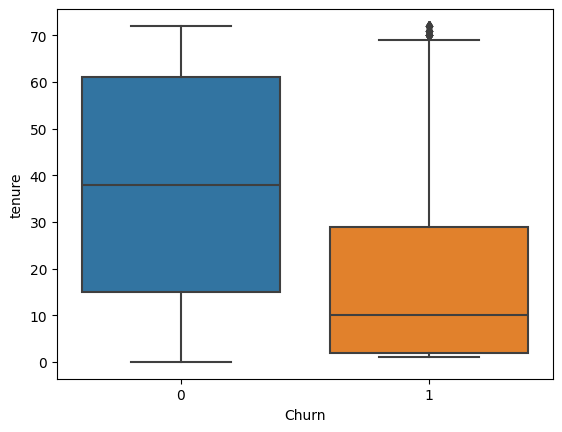

In [29]:
sns.boxplot(x = df.Churn, y = df.tenure)

`observation`:  As we can see from the above plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

## 2. Churn vs Contract Type

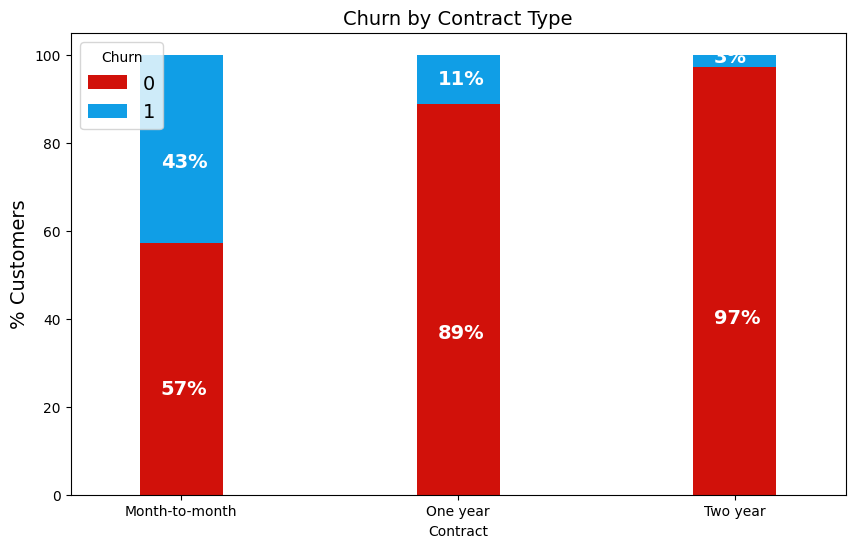

In [30]:
colors = ['#d1110a','#109ee6']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

`observation`: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

## 2. Internet Service vs Churn

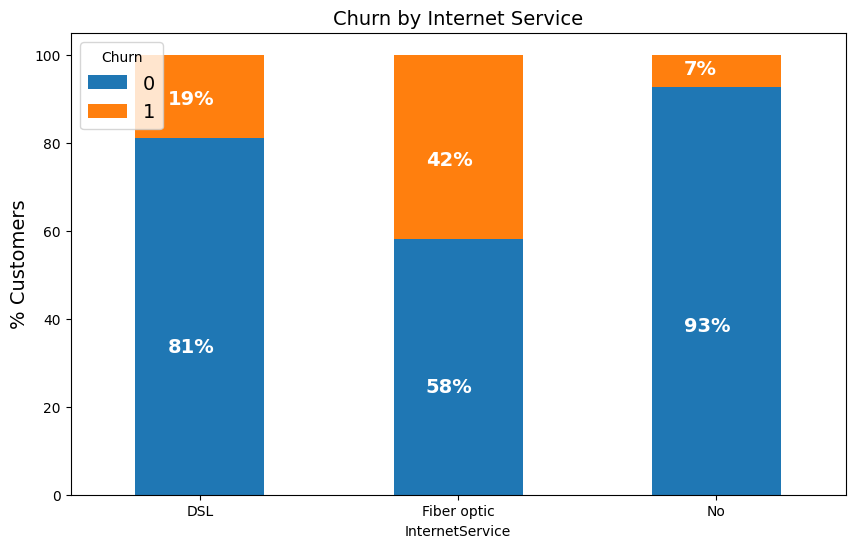

In [31]:
churn = df.groupby(['InternetService','Churn']).size().unstack()

ax = (churn.T*100.0 / churn.T.sum()).T.plot(kind='bar',
                                                                
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

`observation`: Strangely customers with no internet services have only 7% churn rate, and customers with DSL's churn percentae is 19% and Fiber Optic is 58%. Fiber optic is new technology which has a drawback of wire damage issues so it might be the one of the reasons for about 60% churn

## 3. Mothly charges vs Churn

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

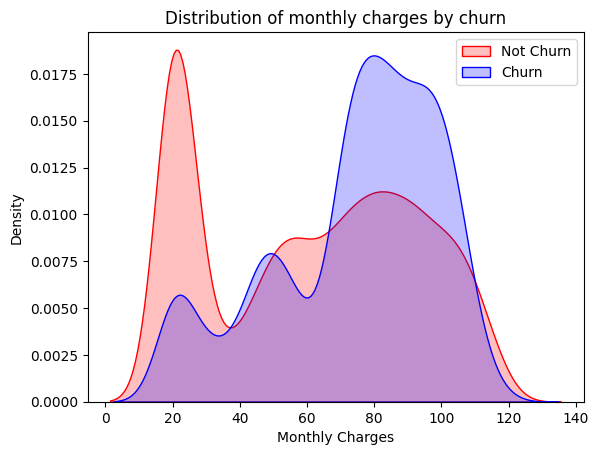

In [32]:
ax = sns.kdeplot(df_dup.MonthlyCharges[(df_dup["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df_dup.MonthlyCharges[(df_dup["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

`observation`: Higher % of customers churn when the monthly charges are high.

## Data preprocessing

In [33]:
df_dummies.isnull().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

In [34]:
df_dummies.dropna(inplace=True)

In [35]:
Y = df_dummies['Churn']
X = df_dummies.drop(columns=['Churn'])

In [36]:
print(X.shape, Y.shape)

(7032, 30) (7032,)


## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.75, random_state=1)

In [38]:
print(x_train.shape, x_test.shape)
print('\n')
print(y_train.shape, y_test.shape)

(5274, 30) (1758, 30)


(5274,) (1758,)


In [39]:
print("Training data size:",len(x_train)*100.0/len(X))
print("\n")
print("Testing data size:",len(x_test)*100.0/len(X))

Training data size: 75.0


Testing data size: 25.0


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transform = pd.DataFrame(scaler.fit_transform(x_train))

X_test_transform = pd.DataFrame(scaler.transform(x_test))

## Logistic Regression Classifier

In [41]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()

regressor.fit(X_train_transform, y_train)

LogisticRegression()

In [44]:
y_predict = regressor.predict(X_test_transform)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


regressor_accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)
matrix = confusion_matrix(y_test,y_predict)

print(f"Accuracy: {regressor_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.80
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1294
           1       0.65      0.54      0.59       464

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758

Confusion Matrix: [[1158  136]
 [ 212  252]]


In [45]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

temp_df.head()

,Actual,Predicted
1778,0,0
5036,1,1
1106,0,0
1665,0,1
927,1,1


## KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier()
neighbor.fit(X_train_transform,y_train)

KNeighborsClassifier()

In [47]:
y_predict = neighbor.predict(X_test_transform)

neighbor_accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)
matrix = confusion_matrix(y_test,y_predict)

print(f"Accuracy: {neighbor_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.75
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1294
           1       0.53      0.53      0.53       464

    accuracy                           0.75      1758
   macro avg       0.68      0.68      0.68      1758
weighted avg       0.75      0.75      0.75      1758

Confusion Matrix: [[1081  213]
 [ 220  244]]


In [48]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

temp_df.head()

,Actual,Predicted
1778,0,0
5036,1,1
1106,0,0
1665,0,1
927,1,1


## SVClassifier

In [49]:
from sklearn.svm import SVC

support = SVC()

support.fit(X_train_transform,y_train)

SVC()

In [50]:
y_predict = support.predict(X_test_transform)

support_accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)
matrix = confusion_matrix(y_test,y_predict)

print(f"Accuracy: {support_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.80
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.65      0.49      0.56       464

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758

Confusion Matrix: [[1173  121]
 [ 235  229]]


In [51]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

temp_df.head()

,Actual,Predicted
1778,0,0
5036,1,1
1106,0,0
1665,0,1
927,1,1


## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_train_transform,y_train)

DecisionTreeClassifier()

In [53]:
y_predict = tree.predict(X_test_transform)

tree_accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)
matrix = confusion_matrix(y_test,y_predict)

print(f"Accuracy: {tree_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.72
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1294
           1       0.47      0.50      0.49       464

    accuracy                           0.72      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.73      0.72      0.72      1758

Confusion Matrix: [[1035  259]
 [ 231  233]]


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_transform,y_train)

RandomForestClassifier()

In [55]:
y_predict = forest.predict(X_test_transform)

forest_accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)
matrix = confusion_matrix(y_test,y_predict)

print(f"Accuracy: {forest_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.79
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.63      0.47      0.54       464

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758

Confusion Matrix: [[1167  127]
 [ 245  219]]


In [56]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

temp_df.sample(8)

,Actual,Predicted
1566,0,0
4413,1,1
624,1,0
869,0,0
786,0,0
1812,0,1
6771,0,0
3822,0,1


## ADABoost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier()
boost.fit(X_train_transform,y_train)


AdaBoostClassifier()

In [58]:
y_predict = boost.predict(X_test_transform)

boost_accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)
matrix = confusion_matrix(y_test,y_predict)

print(f"Accuracy: {boost_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.81
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.67      0.54      0.60       464

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758

Confusion Matrix: [[1168  126]
 [ 212  252]]


## XGboost Classifier

In [59]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_transform,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_predict = XGB.predict(X_test_transform)

XGB_accuracy = accuracy_score(y_test,y_predict)
report = classification_report(y_test,y_predict)
matrix = confusion_matrix(y_test,y_predict)

print(f"Accuracy: {XGB_accuracy:.2f}")
print("Classification Report:", report)
print("Confusion Matrix:", matrix)

Accuracy: 0.78
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1294
           1       0.61      0.50      0.55       464

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758

Confusion Matrix: [[1143  151]
 [ 230  234]]


## Making a dataframe for all the model accuarcy

In [65]:
models_data = {
    'Model': ['Logistic Regressor', 'KNN Classifier', 'SVClassifer', 
              'Decision Tree Classifier', 'Random Forest Classifier', 
              'ADB Classifier', 'XGB classifier'],
    'Accuracy': [regressor_accuracy, neighbor_accuracy, support_accuracy,
                 tree_accuracy, forest_accuracy, boost_accuracy, XGB_accuracy]
}

models = pd.DataFrame(models_data)

print(models)

                      Model  Accuracy
0        Logistic Regressor  0.802048
1            KNN Classifier  0.753697
2               SVClassifer  0.797497
3  Decision Tree Classifier  0.721274
4  Random Forest Classifier  0.788396
5            ADB Classifier  0.807736
6            XGB classifier  0.783276


## Plotting all the models we have used 

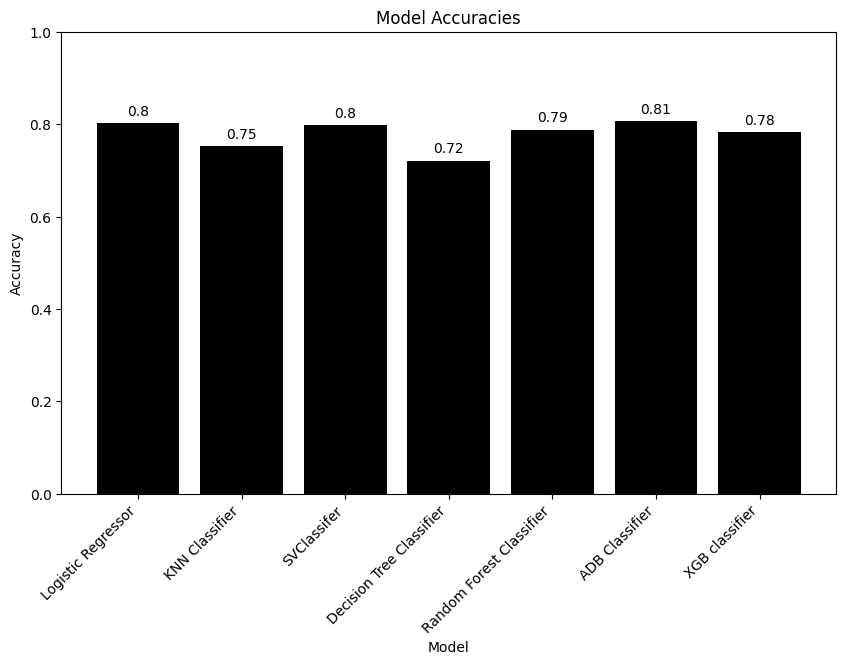

In [71]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models.index, models['Accuracy'], color='black')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(models.index, models['Model'], rotation=45, ha='right')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

`observation`: Interestingly with ADA Boost I was able to increase the accuracy on test data to almost 81%. Clearly, ADA Boost is a winner among all other techniques. On the other hand Decision tree classifier gave lowest accuracy of 72%.